In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.calibration import CalibrationDisplay
import pandas as pd
import numpy as np

import sys
sys.path.append('../')

from src.bet_sizing import SimultaneousKelly

[CV] END criterion=entropy, max_depth=7, max_features=sqrt, max_leaf_nodes=10, n_estimators=200; total time=   5.7s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, max_leaf_nodes=20, n_estimators=50; total time=   1.7s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, max_leaf_nodes=20, n_estimators=100; total time=   3.8s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, max_leaf_nodes=20, n_estimators=200; total time=   6.3s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, max_leaf_nodes=30, n_estimators=100; total time=   6.6s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=30, n_estimators=100; total time=   1.4s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, max_leaf_nodes=30, n_estimators=200; total time=   2.3s
[CV] END criterion=entropy, max_depth=3, max_features=None, max_leaf_nodes=None, n_estimators=50; total time=   5.6s
[CV] END criterion=entropy, max_depth=3, max_features=None, max_leaf_nod

In [18]:
train_df = pd.read_csv("../data/processed/train.csv").drop(columns=["BOUT_ID", "EVENT_ID", "DATE", "BOUT_ORDINAL"])
test_df = pd.read_csv("../data/processed/test.csv").drop(columns=["BOUT_ID", "EVENT_ID", "DATE", "BOUT_ORDINAL"])
test_df = test_df.loc[test_df["RED_WIN"].notnull()]

In [19]:
X_train = train_df.drop(columns=["RED_WIN"])
y_train = train_df["RED_WIN"]
X_test = test_df.drop(columns=["RED_WIN"])
y_test = test_df["RED_WIN"]

In [20]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
param_grid = {
    "max_depth": [9, 10, 11, 12],
    "max_leaf_nodes": [None, 70, 80, 90, 100],
}

clf = RandomForestClassifier(n_estimators=200, criterion="entropy", max_features="sqrt")
grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring="neg_log_loss", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [55]:
grid_search.best_params_

{'max_depth': 11, 'max_leaf_nodes': 80}

In [56]:
y_pred_train = grid_search.predict_proba(X_train)[:, 1]
log_loss(y_train, y_pred_train) # type: ignore

0.512571840681196

In [57]:
y_pred_test = grid_search.predict_proba(X_test)[:, 1] # type: ignore
log_loss(y_test, y_pred_test) # type: ignore

0.6268500239945551

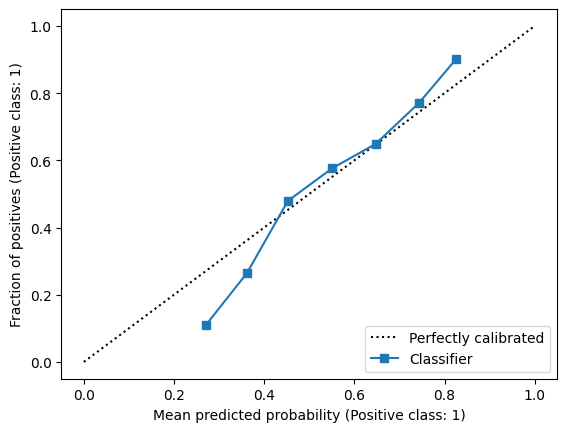

[CV] END criterion=gini, max_depth=9, max_features=None, max_leaf_nodes=40; total time=  40.5s
[CV] END criterion=gini, max_depth=9, max_features=None, max_leaf_nodes=40; total time=  46.0s
[CV] END criterion=gini, max_depth=9, max_features=None, max_leaf_nodes=60; total time= 1.1min
[CV] END criterion=gini, max_depth=9, max_features=sqrt, max_leaf_nodes=40; total time=   6.7s
[CV] END criterion=gini, max_depth=9, max_features=sqrt, max_leaf_nodes=40; total time=   6.1s
[CV] END criterion=gini, max_depth=9, max_features=sqrt, max_leaf_nodes=50; total time=  13.9s
[CV] END criterion=gini, max_depth=11, max_features=None, max_leaf_nodes=None; total time= 1.4min
[CV] END criterion=gini, max_depth=11, max_features=None, max_leaf_nodes=60; total time=  51.7s
[CV] END criterion=gini, max_depth=11, max_features=sqrt, max_leaf_nodes=None; total time=   7.7s
[CV] END criterion=gini, max_depth=11, max_features=sqrt, max_leaf_nodes=40; total time=   5.6s
[CV] END criterion=gini, max_depth=11, max

In [58]:
disp = CalibrationDisplay.from_predictions(y_test, y_pred_test, n_bins=10)